<a href="https://colab.research.google.com/github/CatarinaL/ddosLogs/blob/master/ddos_logs_logit_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install category_encoders

import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import category_encoders as ce
from category_encoders.wrapper import PolynomialWrapper

In [5]:
#/content/drive/MyDrive/datasets/ddosLogs/final-dataset.arff
np.random.seed(123)
file = "/content/drive/MyDrive/datasets/ddosLogs/final-dataset.arff"

data, meta = arff.loadarff(file)
df = pd.DataFrame(data=data)
df.info

<bound method DataFrame.info of          SRC_ADD  DES_ADD  ...  LAST_PKT_RESEVED     PKT_CLASS
0           3.00    24.30  ...         50.021920     b'Normal'
1          15.00    24.15  ...         50.030211     b'Normal'
2          24.15    15.00  ...         50.060221  b'UDP-Flood'
3          24.90     9.00  ...         50.060098     b'Normal'
4          24.80     8.00  ...         50.061864     b'Normal'
...          ...      ...  ...               ...           ...
2160663    24.10    10.00  ...         50.040562     b'Normal'
2160664    24.12    12.00  ...         50.051067     b'Normal'
2160665     1.00    24.10  ...         50.013418     b'Normal'
2160666     5.00    24.50  ...         50.027339     b'Normal'
2160667    15.00    24.15  ...         50.030211     b'Normal'

[2160668 rows x 28 columns]>

In [6]:
#checking for nulls
df.isnull().values.any()

False

In [7]:
#decode byte strings to remove the "b" before the srting values at cols PKT_CLASS, NODE_NAME_FROM, NODE_NAME_TO, FLAGS, PKT_TYPE 
categoricals = ["NODE_NAME_FROM", "NODE_NAME_TO", "FLAGS", "PKT_TYPE", "PKT_CLASS"]

for categorical in categoricals:
  df[categorical] = df[categorical].apply(lambda x: x.decode('utf-8')).astype("category") 

intgs = ["SRC_ADD", "DES_ADD", "PKT_ID", "FROM_NODE", "TO_NODE", "FID"]
for intg in intgs:
  df[intg] = df[intg].astype('int64')

df.info

copying the df to encode transform categoricals into dummy variables so I can use them in a logistical regression model, leaving original intact 

In [16]:
df2 = df.copy()

X = df2.iloc[:, 0:-1]
y = df2.iloc[:, [-1]]
#split into test and training sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
#dummy variables w/ WoE
# polynomial encoder wrapper for selected categorical variables - weight of evidence encoder
enc = PolynomialWrapper(ce.WOEEncoder(cols=["NODE_NAME_FROM", "NODE_NAME_TO", "FLAGS", "PKT_TYPE"]))

# transform the datasets
X_train_enc = enc.fit_transform(X_train, y_train)
X_test_enc = enc.transform(X_test)

X_train_enc.info()

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512467 entries, 303819 to 305711
Data columns (total 39 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SRC_ADD                    1512467 non-null  int64  
 1   DES_ADD                    1512467 non-null  int64  
 2   PKT_ID                     1512467 non-null  int64  
 3   FROM_NODE                  1512467 non-null  int64  
 4   TO_NODE                    1512467 non-null  int64  
 5   PKT_SIZE                   1512467 non-null  float64
 6   FID                        1512467 non-null  int64  
 7   SEQ_NUMBER                 1512467 non-null  float64
 8   NUMBER_OF_PKT              1512467 non-null  float64
 9   NUMBER_OF_BYTE             1512467 non-null  float64
 10  PKT_IN                     1512467 non-null  float64
 11  PKT_OUT                    1512467 non-null  float64
 12  PKT_R                      1512467 non-null  float64
 13  PKT_DELA

In [18]:
#TODO try without scaling, try different scalers
#normalize 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.fit_transform(X_test_enc)

In [46]:
#PCA analysis for dimensionality reduction
print(f"Dataset dimensions: {X_train_scaled.shape}, {len(X_train_scaled[0])} features after encoding.")

from sklearn.decomposition import PCA
pca2 = PCA(svd_solver='full')


Dataset dimensions: (1512467, 39), 39 features after encoding.


In [32]:
print(f"PCA redimensioned: {X_train_pca_fit2.shape}, {len(X_train_pca_fit2[0])} features.")
pca2.explained_variance_ratio_ #variance of selected features

PCA redimensioned: (1512467, 39), 39 features.


array([2.37937833e-01, 1.93565941e-01, 1.34741757e-01, 1.02747875e-01,
       7.04295253e-02, 5.52383201e-02, 5.22589908e-02, 3.71064877e-02,
       2.59528244e-02, 1.85211370e-02, 1.65097715e-02, 1.03278876e-02,
       8.98292186e-03, 8.63250539e-03, 6.25471469e-03, 5.74217745e-03,
       2.87450411e-03, 2.67920540e-03, 2.39416046e-03, 2.06215814e-03,
       1.34998294e-03, 9.39833047e-04, 8.32620230e-04, 7.65201429e-04,
       5.12735988e-04, 3.26852113e-04, 2.10216734e-04, 9.14387382e-05,
       1.04197630e-05, 9.76609059e-10, 1.48430609e-10, 7.06539262e-11,
       4.51485356e-12, 6.57082950e-14, 2.32649286e-32, 3.61834344e-33,
       1.21927768e-33, 1.21927768e-33, 1.21927768e-33])

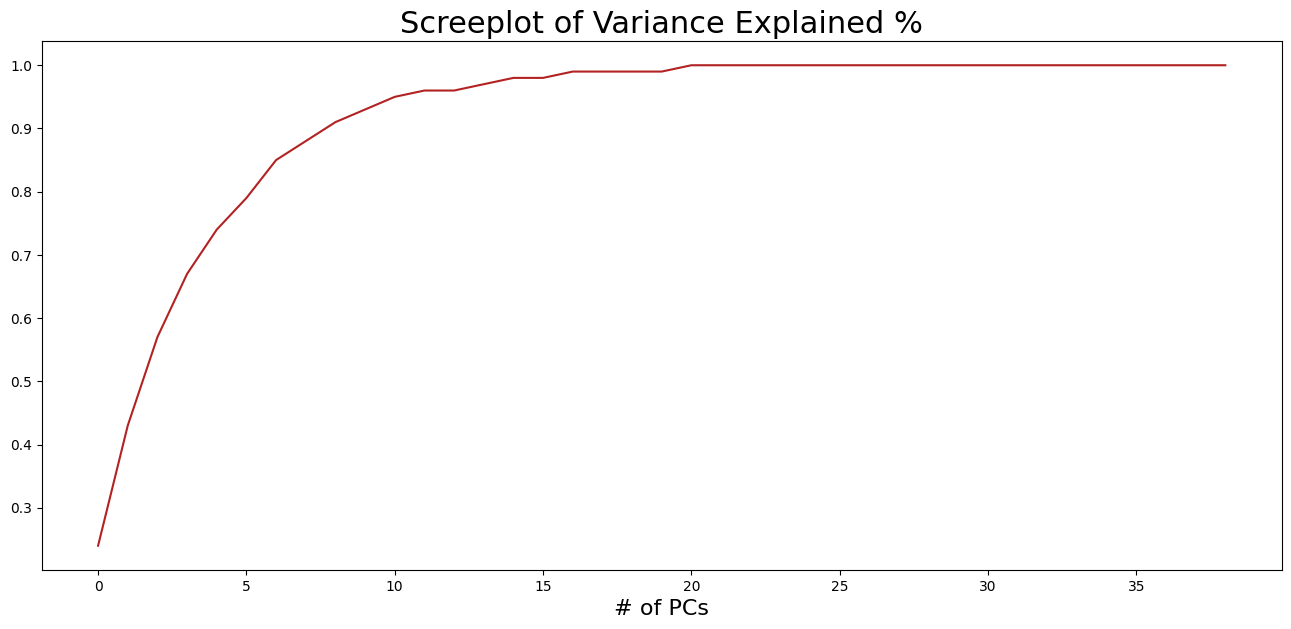

In [33]:
variance_exp_cumsum = pca2.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

no gains after 20 components, and residual after 10

In [42]:
pca1 = PCA(n_components=10) 
pca_X=pca1.fit_transform(X_train_scaled)
pca_X.shape

(1512467, 10)

In [43]:
X_orig = pca1.inverse_transform(pca_X)
pd.DataFrame(X_orig).round().head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,-0.0,1.0,2.0,-0.0,1.0,0.0,2.0,0.0,-2.0,-1.0,2.0,2.0,2.0,-0.0,-1.0,-1.0,0.0,-1.0,-0.0,2.0,2.0,2.0,1.0,-0.0,-0.0,0.0,2.0,-0.0,-1.0,0.0,-1.0,-0.0,-1.0,0.0,-1.0,-0.0,-1.0,-0.0,-1.0
1,1.0,-1.0,-1.0,1.0,-0.0,-0.0,-0.0,-0.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-0.0,-1.0,-0.0,-1.0,-0.0,-1.0,-1.0,-0.0,-0.0,-0.0,-1.0,0.0,-0.0,-0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-0.0,-0.0,-0.0,-1.0
2,-1.0,1.0,1.0,1.0,1.0,0.0,-0.0,-0.0,1.0,1.0,1.0,1.0,1.0,-0.0,-0.0,0.0,0.0,1.0,-0.0,1.0,1.0,-0.0,-0.0,-0.0,1.0,0.0,-1.0,-0.0,1.0,0.0,0.0,-1.0,1.0,0.0,1.0,-1.0,-0.0,-0.0,1.0
3,1.0,-0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,1.0,1.0,-0.0,-1.0,-1.0,0.0,-1.0,-0.0,1.0,1.0,1.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-1.0,0.0,-0.0,0.0,-1.0
4,1.0,-1.0,-0.0,1.0,-0.0,-0.0,-1.0,-0.0,1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-0.0,-1.0,-0.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,0.0,-1.0,-0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-0.0,-0.0,-1.0


The “lbfgs”, “sag” and “newton-cg” solvers only support 
 regularization or no regularization, and are found to converge faster for some high-dimensional data. Setting multi_class to “multinomial” with these solvers learns a true multinomial logistic regression model, which means that its probability estimates should be better calibrated than the default “one-vs-rest” setting.

The “sag” solver uses Stochastic Average Gradient descent (see https://hal.inria.fr/hal-00860051/document). It is faster than other solvers for large datasets, when both the number of samples and the number of features are large.

In [ ]:
#instantiate the model - multinomial w/ sag solver #TODO: fix, model is not converging
'''
result with c= 0.05 and max_iter =100
array([[  1207,      0,     75,      0,      0],
       [    13, 581075,     60,      0,      0],
       [     0,    117,   1860,      0,      0],
       [     9,   2490,     88,   1222,      0],
       [     0,   5939,      0,      0,  54046]]) 
'''

logreg = LogisticRegression(solver='sag', C=0.5, multi_class='multinomial', max_iter = 250,
                          random_state=42)

# fit the model with data
logreg.fit(X_train_scaled, np.ravel(y_train, order = 'C')) #np.ravel is used to flatten the target afeature array, to avoid a DataConversionWarning

#
y_pred=logreg.predict(X_test_scaled)

# import the metrics class
confusion_matrix(y_test, y_pred)
# visualize with plot_confusion_matrix()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[  1207,      0,     75,      0,      0],
       [    13, 581075,     60,      0,      0],
       [     0,    117,   1860,      0,      0],
       [     9,   2490,     88,   1222,      0],
       [     0,   5939,      0,      0,  54046]])

In [ ]:
target_classes = np.unique(y_test, return_counts=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_classes[0]))

              precision    recall  f1-score   support

  HTTP-FLOOD       0.98      0.94      0.96      1282
      Normal       0.99      1.00      0.99    581148
      SIDDOS       0.89      0.94      0.92      1977
       Smurf       1.00      0.32      0.49      3809
   UDP-Flood       1.00      0.90      0.95     59985

    accuracy                           0.99    648201
   macro avg       0.97      0.82      0.86    648201
weighted avg       0.99      0.99      0.99    648201



Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

The F-measure (Fbeta and F1 measures) can be interpreted as a weighted harmonic mean of the precision and recall. A Fbeta measure reaches its best value at 1 and its worst score at 0. With beta=0, Fbeta and F1 are equivalent, and the recall and the precision are equally important.

The precision_recall_curve computes a precision-recall curve from the ground truth label and a score given by the classifier by varying a decision threshold.

The average_precision_score function computes the average precision (AP) from prediction scores. The value is between 0 and 1 and higher is better. With random predictions, the AP is the fraction of positive samples.

References [Manning2008] and [Everingham2010] present alternative variants of AP that interpolate the precision-recall curve. Currently, average_precision_score does not implement any interpolated variant. References [Davis2006] and [Flach2015] describe why a linear interpolation of points on the precision-recall curve provides an overly-optimistic measure of classifier performance. This linear interpolation is used when computing area under the curve with the trapezoidal rule in auc.

See also https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall:",metrics.recall_score(y_test, y_pred, average = "weighted"))

Accuracy: 0.9864378487537044
Precision: 0.986643352071877
Recall: 0.9864378487537044


Precision-Recall Trade-off
When building a classification model, we need to consider both precision and recall. It is always possible to increase one value at the expense of the other (recall-focussed model/precision-focussed model)

In [ ]:
logreg.predict_log_proba(X_test_scaled)

array([[-12.86770013,  -0.01483056,  -8.94870411,  -5.51344323,
         -4.55101892],
       [-12.12136262,  -0.01447118,  -9.0132526 ,  -5.53980764,
         -4.57440147],
       [-12.43695299,  -0.01464863,  -8.70426895,  -5.51956874,
         -4.56937469],
       ...,
       [-10.58954292,  -0.01452914,  -8.47362062,  -5.5314572 ,
         -4.5824503 ],
       [-13.2414347 ,  -0.0145437 ,  -8.76370039,  -5.49550592,
         -4.58780264],
       [-10.32031095,  -0.01486031,  -8.10861068,  -5.44525921,
         -4.5952371 ]])

In [ ]:
#todo model params analysis, interpretation

In [ ]:
#todo: analysis to select new set of features - https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest, chi2, mutual info..

In [ ]:
#todo:
#fit different models and compare through a loop

#todo try fitting several models and comparing faster w/ pipelines
''''
# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
''''

In [ ]:
#todo visualizations

Logistic regression with CV

In [ ]:
#compare ovr (fits binary logit to each class) vs multinomial (applies loss function over the whole prob distribution)
#cv param is number of folds, select 5 or 10

Ridge classifier 